# Export onnx with your trained weights

In [2]:
# revise the code according to your model
# the second line is the location of exporting script, base on your nature of your task (classification/ detection/ segmentation)
# the third line is the location of configs of your model
# the fourth line is the location of weights (pth) of your model
# the fifth line is a sample of image
# the sixth line is exporting location
# the seventh line is choosing model to run on cpu or cuda

In [1]:
%run mmdeploy/tools/deploy.py \
mmdeploy/configs/mmdet/instance-seg/instance-seg_onnxruntime_dynamic.py \
mmdetection/tutorial_exps/cascade-mask-rcnn_r50_fpn_1x_balloon.py \
mmdetection/tutorial_exps/epoch_12.pth \
mmdetection/data/balloon/val/3825919971_93fb1ec581_b.jpg \
--work-dir mmdeploy_model/cascade-mask-rcnn \
--device cuda

06/03 12:03:04 - mmengine - INFO - Start pipeline mmdeploy.apis.pytorch2onnx.torch2onnx in subprocess
06/03 12:03:05 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "Codebases" registry tree. As a workaround, the current "Codebases" registry in "mmdeploy" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
06/03 12:03:05 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "mmdet_tasks" registry tree. As a workaround, the current "mmdet_tasks" registry in "mmdeploy" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
Loads checkpoint by local backend from path: mmdetection/tutorial_exps/epoch_12.pth
06/03 12:03:06 - mmengine - WARNING - DeprecationWarning: get_onnx_config will be de

/home/z890/Downloads/ml_sample/detection/mm_CascadeMaskRCNN/mmdeploy/mmdeploy/core/optimizers/function_marker.py:160: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  ys_shape = tuple(int(s) for s in ys.shape)
/home/z890/Downloads/ml_sample/detection/mm_CascadeMaskRCNN/mmdetection/mmdet/models/dense_heads/anchor_head.py:115: UserWarning: DeprecationWarning: anchor_generator is deprecated, please use "prior_generator" instead
  warnings.warn('DeprecationWarning: anchor_generator is deprecated, '
/home/z890/Downloads/ml_sample/detection/mm_CascadeMaskRCNN/mmdetection/mmdet/models/task_modules/prior_generators/anchor_generator.py:356: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon

06/03 12:03:09 - mmengine - INFO - Execute onnx optimize passes.
06/03 12:03:10 - mmengine - INFO - Finish pipeline mmdeploy.apis.pytorch2onnx.torch2onnx
06/03 12:03:11 - mmengine - INFO - Start pipeline mmdeploy.apis.utils.utils.to_backend in main process
06/03 12:03:11 - mmengine - INFO - Finish pipeline mmdeploy.apis.utils.utils.to_backend
06/03 12:03:11 - mmengine - INFO - visualize onnxruntime model start.
06/03 12:03:13 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "Codebases" registry tree. As a workaround, the current "Codebases" registry in "mmdeploy" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
06/03 12:03:13 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "mmdet_tasks" registry tree. As a workaround, the current "mmdet_tasks" registry in "mmdeploy" is used to build instance. This may c

2025-06-03 12:03:13.844904823 [W:onnxruntime:, transformer_memcpy.cc:83 ApplyImpl] 31 Memcpy nodes are added to the graph main_graph for CUDAExecutionProvider. It might have negative impact on performance (including unable to run CUDA graph). Set session_options.log_severity_level=1 to see the detail logs before this message.
2025-06-03 12:03:13.848261770 [W:onnxruntime:, session_state.cc:1280 VerifyEachNodeIsAssignedToAnEp] Some nodes were not assigned to the preferred execution providers which may or may not have an negative impact on performance. e.g. ORT explicitly assigns shape related ops to CPU to improve perf.
2025-06-03 12:03:13.848267478 [W:onnxruntime:, session_state.cc:1282 VerifyEachNodeIsAssignedToAnEp] Rerunning with verbose output on a non-minimal build will show node assignments.


06/03 12:03:21 - mmengine - INFO - visualize onnxruntime model success.
06/03 12:03:21 - mmengine - INFO - visualize pytorch model start.
06/03 12:03:23 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "Codebases" registry tree. As a workaround, the current "Codebases" registry in "mmdeploy" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
06/03 12:03:23 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "mmdet_tasks" registry tree. As a workaround, the current "mmdet_tasks" registry in "mmdeploy" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.


/home/z890/Downloads/ml_sample/detection/mm_CascadeMaskRCNN/mmdetection/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)


Loads checkpoint by local backend from path: mmdetection/tutorial_exps/epoch_12.pth
06/03 12:03:25 - mmengine - INFO - visualize pytorch model success.
06/03 12:03:25 - mmengine - INFO - All process success.


# Inference the onnx

In [2]:
# providers set provider priority cuda or cpu
import onnxruntime
sess = onnxruntime.InferenceSession("mmdeploy_model/cascade-mask-rcnn/end2end.onnx", providers=["CUDAExecutionProvider"])
print(sess.get_providers())

['CUDAExecutionProvider', 'CPUExecutionProvider']


2025-06-03 12:03:33.670504342 [W:onnxruntime:, transformer_memcpy.cc:83 ApplyImpl] 31 Memcpy nodes are added to the graph main_graph for CUDAExecutionProvider. It might have negative impact on performance (including unable to run CUDA graph). Set session_options.log_severity_level=1 to see the detail logs before this message.
2025-06-03 12:03:33.673932385 [W:onnxruntime:, session_state.cc:1280 VerifyEachNodeIsAssignedToAnEp] Some nodes were not assigned to the preferred execution providers which may or may not have an negative impact on performance. e.g. ORT explicitly assigns shape related ops to CPU to improve perf.
2025-06-03 12:03:33.673937242 [W:onnxruntime:, session_state.cc:1282 VerifyEachNodeIsAssignedToAnEp] Rerunning with verbose output on a non-minimal build will show node assignments.


In [3]:
# instance segmentation by official
from mmdeploy.apis import inference_model
model_cfg = 'mmdetection/tutorial_exps/cascade-mask-rcnn_r50_fpn_1x_balloon.py'
deploy_cfg = 'mmdeploy/configs/mmdet/instance-seg/instance-seg_onnxruntime_dynamic.py'
backend_files = 'mmdeploy_model/cascade-mask-rcnn/end2end.onnx'
image = 'mmdetection/data/balloon/val/14898532020_ba6199dd22_k.jpg'
result = inference_model(
    model_cfg = model_cfg,
    deploy_cfg = deploy_cfg,
    backend_files = [backend_files],
    img = image,
    device='cuda'
)
print(result)

06/03 12:03:35 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "Codebases" registry tree. As a workaround, the current "Codebases" registry in "mmdeploy" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
06/03 12:03:35 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "mmdet_tasks" registry tree. As a workaround, the current "mmdet_tasks" registry in "mmdeploy" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
06/03 12:03:35 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "backend_detectors" registry tree. As a workaround, the current "backend_detectors" registry in "mmdeploy" is used to build instance. This may cause unexpected failure when running

2025-06-03 12:03:35.496493239 [W:onnxruntime:, transformer_memcpy.cc:83 ApplyImpl] 31 Memcpy nodes are added to the graph main_graph for CUDAExecutionProvider. It might have negative impact on performance (including unable to run CUDA graph). Set session_options.log_severity_level=1 to see the detail logs before this message.
2025-06-03 12:03:35.499573511 [W:onnxruntime:, session_state.cc:1280 VerifyEachNodeIsAssignedToAnEp] Some nodes were not assigned to the preferred execution providers which may or may not have an negative impact on performance. e.g. ORT explicitly assigns shape related ops to CPU to improve perf.
2025-06-03 12:03:35.499578057 [W:onnxruntime:, session_state.cc:1282 VerifyEachNodeIsAssignedToAnEp] Rerunning with verbose output on a non-minimal build will show node assignments.


[<DetDataSample(

    META INFORMATION
    pad_shape: (800, 1216)
    scale_factor: (0.5859375, 0.5860805860805861)
    img_id: 0
    img_path: 'mmdetection/data/balloon/val/14898532020_ba6199dd22_k.jpg'
    img_shape: (800, 1200)
    batch_input_shape: (800, 1216)
    ori_shape: (1365, 2048)

    DATA FIELDS
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
            bboxes: tensor([[ 612.7565,   69.2417,  838.9590,  351.6546],
                        [ 524.3375,  323.1597,  755.0012,  601.1614],
                        [ 126.8666,  418.3690,  202.1473,  499.7569],
                        [1964.0337,  459.1271, 2018.6475,  515.8213],
                        [1918.7887,  465.4805, 1963.4183,  515.5579],
                        [ 516.0648,  357.0483,  558.7792,  420.9222],
                        [  20.5900,  536.5650,   72.3882,  606.3726],


/home/z890/Downloads/ml_sample/detection/mm_CascadeMaskRCNN/mmengine/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '
/home/z890/Downloads/ml_sample/detection/mm_CascadeMaskRCNN/mmengine/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.TensorboardVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


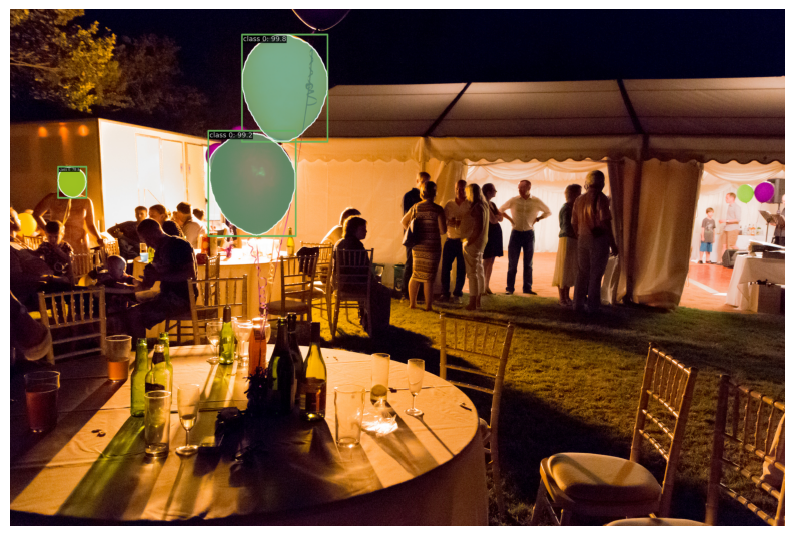

In [4]:
# plot the segmentation
import mmcv
from mmdet.registry import VISUALIZERS
import cv2
import numpy as np
from mmdeploy.utils import get_input_shape, load_config
import matplotlib.pyplot as plt

# read image
img = mmcv.imread(image)
img = mmcv.imconvert(img, 'bgr', 'rgb')

# initialize visualizer
deploy_cfg, model_cfg = load_config(deploy_cfg, model_cfg)
visualizer = VISUALIZERS.build(model_cfg.visualizer)

# Create a new DetDataSample instead of modifying the existing one
threshold = 0.7  # Set an appropriate threshold for your case

# Filter based on confidence threshold
count = sum(result[0].pred_instances.scores > threshold)  # Get the number of detections above threshold

# Slice the scores, bboxes, and labels
sliced_scores = result[0].pred_instances.scores[:count]
sliced_bboxes = result[0].pred_instances.bboxes[:count]
sliced_labels = result[0].pred_instances.labels[:count]
sliced_masks = result[0].pred_instances.masks[:count]

# Create a new InstanceData object with the sliced fields
from mmengine.structures import InstanceData
new_pred_instances = InstanceData(
    scores=sliced_scores,
    bboxes=sliced_bboxes,
    labels=sliced_labels,
    masks=sliced_masks
)

# Update the result with the new pred_instances
result[0].pred_instances = new_pred_instances

visualizer.add_datasample(
    'result',
    img,
    data_sample=result[0],
    draw_gt=False,
    wait_time=0
)
# draw
drawn_img = visualizer.get_image()
# plot with plt
plt.figure(figsize=(10, 8))
plt.imshow(drawn_img)
plt.axis('off')
plt.show()

Available providers: ['CPUExecutionProvider']
Model output: [array([[[3.5903864e+02, 4.0585251e+01, 4.9157886e+02, 2.0609406e+02,
         9.9757749e-01],
        [3.0722925e+02, 1.8939453e+02, 4.4238596e+02, 3.5232715e+02,
         9.9223256e-01],
        [7.4335083e+01, 2.4519765e+02, 1.1844591e+02, 2.9289798e+02,
         7.8279686e-01],
        [1.1507955e+03, 2.6908817e+02, 1.1828021e+03, 3.0230289e+02,
         6.7692763e-01],
        [1.1242958e+03, 2.7280075e+02, 1.1504420e+03, 3.0216312e+02,
         5.7534808e-01],
        [3.0238089e+02, 2.0926006e+02, 3.2740991e+02, 2.4669688e+02,
         1.8738955e-01],
        [1.2066980e+01, 3.1447351e+02, 4.2415054e+01, 3.5538220e+02,
         1.7301381e-01],
        [8.1613208e+02, 6.8522528e+02, 1.0075377e+03, 7.9502460e+02,
         1.4303219e-01],
        [1.1228771e+03, 2.6822778e+02, 1.1821610e+03, 3.0371973e+02,
         1.2350527e-01],
        [5.5786395e+02, 5.8050250e+02, 5.8479303e+02, 6.0744342e+02,
         1.1209305e-01],

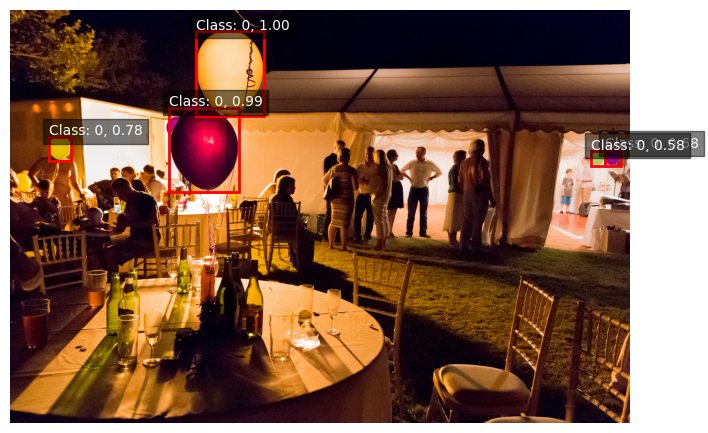

In [5]:
#Instance segmentation without torch (may have little difference with official)
import cv2
import numpy as np
import onnxruntime
import matplotlib.pyplot as plt

def preprocess_image(image):
    ori_shape = image.shape[:2]  # (H, W)

    '''
    according to config
        pipeline=[
        dict(backend_args=None, type='LoadImageFromFile'),
        dict(keep_ratio=True, scale=(
            1333,
            800,
        ), type='Resize'),
    Modified resize logic:
    - Short edge at least 800
    - Long edge at most 1333
    - Keep aspect ratio
    - If requirements conflict, prioritize 1333 limit
    '''
    h, w = ori_shape
    min_size = 800
    max_size = 1333
    
    # Calculate scale factors for both dimensions
    scale1 = min_size / min(h, w)
    scale2 = max_size / max(h, w)
    
    # Use the smaller scale to meet both requirements
    scale = min(scale1, scale2)
    
    new_h, new_w = int(h * scale), int(w * scale)
    resized = cv2.resize(image, (new_w, new_h))

    '''
    according to config
        data_preprocessor=dict(
        bgr_to_rgb=True,
        mean=[
            123.675,
            116.28,
            103.53,
        ],
        pad_mask=True,
        pad_size_divisor=32,
        std=[
            58.395,
            57.12,
            57.375,
        ],
    Pad to make dimensions divisible by 32
    '''
    pad_h = (32 - new_h % 32) % 32
    pad_w = (32 - new_w % 32) % 32
    
    pad_image = np.full((new_h + pad_h, new_w + pad_w, 3), 114.0, dtype=np.float32)
    pad_image[:new_h, :new_w, :] = resized

    '''
    Normalization (bgr_to_rgb=True, so cvtColor)
    '''
    pad_image = cv2.cvtColor(pad_image, cv2.COLOR_BGR2RGB) 
    mean = np.array([123.675, 116.28, 103.53])
    std = np.array([58.395, 57.12, 57.375])
    normalized_image = (pad_image - mean) / std

    # Transpose to CHW layout
    normalized_image = normalized_image.transpose(2, 0, 1)

    meta = {
        'img_shape': (new_h, new_w),
        'pad_shape': (new_h + pad_h, new_w + pad_w),
        'scale_factor': scale,
        'ori_shape': ori_shape
    }

    return normalized_image, meta


sess = onnxruntime.InferenceSession("mmdeploy_model/cascade-mask-rcnn/end2end.onnx", providers=["CPUExecutionProvider"])
print("Available providers:", sess.get_providers())

# Load and preprocess the image
image = cv2.imread("mmdetection/data/balloon/val/14898532020_ba6199dd22_k.jpg")

result, meta = preprocess_image(image)

# Get the model's input name (usually 'input' or something similar)
input_name = sess.get_inputs()[0].name

# Run inference on the input image
outputs = sess.run(None, {input_name: [result]})

# Print the output
print("Model output:", outputs)

threshold = 0.5
# Extract boxes and class IDs
boxes, class_ids = outputs[0], outputs[1]

# Convert to numpy
boxes = np.squeeze(boxes)  # Shape: (201, 5) -> (201, 5)
class_ids = np.squeeze(class_ids)  # Shape: (201,)

# Filter boxes with confidence threshold
filtered_boxes = []
filtered_classes = []
filtered_confs = []

for i in range(len(boxes)):
    x1, y1, x2, y2, conf = boxes[i]
    if conf > threshold:
        filtered_boxes.append((x1, y1, x2, y2))
        filtered_classes.append(int(class_ids[i]))
        filtered_confs.append(conf)

# Plot image with bounding boxes
fig, ax = plt.subplots(1, figsize=(8, 8))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
ax.imshow(image)

w_ratio = meta['ori_shape'][1]/meta['img_shape'][1]
h_ratio = meta['ori_shape'][0]/meta['img_shape'][0]
for i, (x1, y1, x2, y2) in enumerate(filtered_boxes):
    x1 = x1*w_ratio 
    x2 = x2*w_ratio
    y1 = y1*h_ratio
    y2 = y2*h_ratio
    conf = filtered_confs[i]
    
    # Draw rectangle
    rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color="red", linewidth=2)
    ax.add_patch(rect)
    
    # Add confidence text
    label = f"Class: {filtered_classes[i]}, {conf:.2f}"
    ax.text(x1, y1 - 5, label, color="white", fontsize=10, bbox=dict(facecolor="black", alpha=0.5))

plt.axis("off")
plt.show()